## Model autoregresyjny stochastycznego szeregu czasowego

https://brain.fuw.edu.pl/edu/index.php/Pracownia_EEG/AR_1

## importy


In [1]:
!pip install -q obci_readmanager

In [3]:
from obci_readmanager.signal_processing.read_manager import ReadManager #nasza biblioteka od braintecha
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit
import os
import math
print(os.getcwd())
import mtmvar

%matplotlib inline
#py.rcParams['figure.figsize'] = [4, 3]
import numpy as np
import matplotlib.pyplot as plt
from  scipy.signal import freqz, group_delay #funkcja obliczająca funkcję systemu
from  scipy.signal import firwin, firwin2     # funkcje do projektowania filtrów FIR
from  scipy.signal import butter, buttord     # funkcje do projektowania filtrów  
from  scipy.signal import cheby1, cheb1ord    # funkcje do projektowania filtrów 
from  scipy.signal import cheby2, cheb2ord    # funkcje do projektowania filtrów 
from  scipy.signal import ellip, ellipord     # funkcje do projektowania filtrów eliptycznych
from  scipy.signal import lfilter, filtfilt # funkcje do aplikowania filtrów
import numpy.fft as fft
import scipy.signal as signal


C:\Users\kaczm\programming\python_eeg\AR


In [4]:
file1 =  ReadManager('dane1/Kopia EEG_Artefakty_zamoczkami.xml','dane1/Kopia EEG_Artefakty_zamoczkami.raw','dane1/Kopia EEG_Artefakty_zamoczkami.tag')
syg1 = file1.get_microvolt_samples()
Fs1 =float(file1.get_param('sampling_frequency'))#ustalamy jak probkowany byl nasz sygnal

file2 = ReadManager('dane1/oczka.xml','dane1/oczka.raw','dane1/oczka.tag')
syg2 = file1.get_microvolt_samples()

2022-05-04 16:51:35,315 - data_source - INFO - All data set requested for the first time. Start reading all data from the file...


## importowanie sygnału

In [38]:


Nazwy=['O1','O2','T5','P3','Pz','P4','T6','T3','C3','Cz','C4','T4','F7','F3','Fz','F4','F8','Fp1','Fp2','VL','VR','VF','EMG','EOG'] 

T=len(syg1[0])/Fs1
t=np.arange(0,T,1/Fs1)
Fsyg=np.zeros(syg1.shape)
Fsyg2=np.zeros(syg2.shape)
fs=Fs1
sygx=np.zeros(np.shape(Fsyg))
sygx2=np.zeros(np.shape(Fsyg2))
[b,a] = butter(1,2/(fs/2),btype='highpass' )
[b1,a1]=butter(4,45/(fs/2),btype='low')
for i in range(len(syg1)):
  Fsyg[i] = filtfilt(b,a,syg1[i])
  Fsyg2[i] = filtfilt(b,a,syg2[i])
 # Fsyg[i] = filtfilt(b1,a1,Fsyg[i])
for i in range(len(syg1)):
  sygx[i]=Fsyg[i]-((Fsyg[2]+Fsyg[8])*0.5) 
  sygx2[i]=Fsyg2[i]-((Fsyg2[2]+Fsyg2[8])*0.5) 
print(np.shape(sygx))


sygtest = np.copy(sygx[:,int(65*fs):int(65*fs+1000)])
bezA = np.delete(sygtest,2,0)
bezA = np.delete(bezA,7,0)
bezA = bezA[0:19]

print(np.shape(bezA))
print(fs)

(26, 77688)
(19, 1000)
256.0


## Pierwsze ćwiczenia, szukanie rzędu modelu


In [37]:
for i in range(1,6):
  P, V =  mtmvar.mult_AR(bezA,i,1)
  print(f'{i} rzad')
  #print(f'Współczynniki {P}')
  print(np.shape(P))
 # print(f'Macierz wariancji {V}')

1 rzad
(1, 19, 19)
2 rzad
(2, 19, 19)
3 rzad
(3, 19, 19)
4 rzad
(4, 19, 19)
5 rzad
(5, 19, 19)


In [7]:
n=20
AIC=np.zeros(n)
for i in range(0,n):
  P, V =  mtmvar.mult_AR(bezA,i,1)
  AIC[i] = np.log(np.linalg.det(V)) + 2*((np.shape(P)[0]*P.shape[1]**2)/bezA.shape[1])
  #AIC[i] = np.log(np.linalg.det(V)) + 2*((np.shape(P)[0])/sygtest.shape[1])
  print(f'AIC dla rzędu {P.shape[0],AIC[i]} ')

#plt.xlim(0,20)
#plt.ylim(3.8,4)
plt.plot(AIC)
plt.grid()
plt.show()

#optymalny rząd - 3-5

AIC dla rzędu (0, 47.66727192244719) 
AIC dla rzędu (1, 26.555074508865406) 
AIC dla rzędu (2, 23.673255748806415) 
AIC dla rzędu (3, 23.348144167016045) 
AIC dla rzędu (4, 23.184066241642647) 
AIC dla rzędu (5, 23.39619807408885) 
AIC dla rzędu (6, 23.43985459591287) 
AIC dla rzędu (7, 23.75288519319141) 
AIC dla rzędu (8, 23.952959270814507) 
AIC dla rzędu (9, 24.08412249366938) 
AIC dla rzędu (10, 24.315053624102628) 
AIC dla rzędu (11, 24.540550822518465) 
AIC dla rzędu (12, 24.76775850728871) 
AIC dla rzędu (13, 25.032731899118524) 
AIC dla rzędu (14, 25.25863362554675) 
AIC dla rzędu (15, 25.505094695894634) 
AIC dla rzędu (16, 25.664179104426537) 
AIC dla rzędu (17, 25.87095728811999) 
AIC dla rzędu (18, 26.064114321045516) 
AIC dla rzędu (19, 26.183270731876846) 


In [8]:
def sin(f,phi,Fs,T):
  t=np.arange(T*Fs)/Fs
  syg=np.sin(t*2*np.pi*f+phi)
  return t,syg
t,sisin=sin(1,0,100,10)

sisin=sisin.reshape(2,500)
t=t[0:500]
plt.plot(t,sisin[0])
plt.show()

## estymacja widma

In [9]:
def widmo_AR(syg,p,Fs,f0=0,fmax=None,step = None):
    if fmax is None:
        fmax = int(Fs/2)
    if step is None:
        step = (fmax-f0)/Fs
    if len(syg.shape) == 1:
        syg = np.reshape(syg,(1,-1))
    freqz = np.arange(f0, fmax,step)
    ch = syg.shape[0]
    A_all, V = mtmvar.mult_AR(syg, p, 1)
    S_all = np.zeros((len(freqz),ch,ch),dtype="complex")
    A = np.eye(ch)
    for ind,fr in enumerate(freqz):
        A_temp = np.zeros((p,A_all.shape[1],A_all.shape[2]),dtype="complex")
        for p_prim in range(p):
            z = np.exp(2*np.pi*1j*fr*1/Fs*(-(p_prim+1)))
            A_temp[p_prim] = A_all[p_prim]*z
        Az = A-np.sum(A_temp,axis=0)
        Az_inv = np.linalg.inv(Az)
        Hf = Az_inv
        Hfconj = np.conj(Hf).T
        S1 = np.dot(Hf,V)
        S2 = np.dot(S1,Hfconj)
        S_all[ind,:,:] = S2
    return freqz,S_all


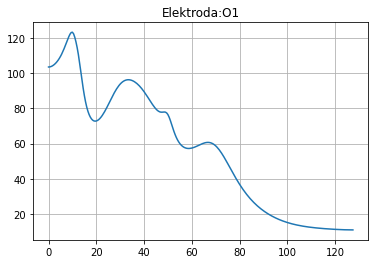

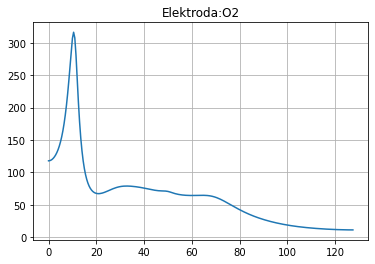

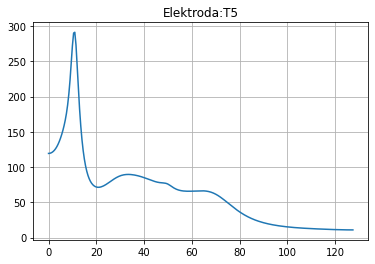

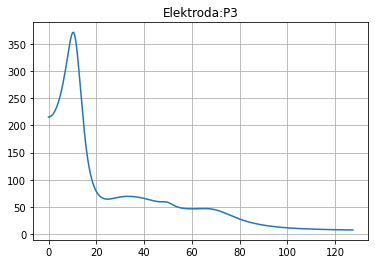

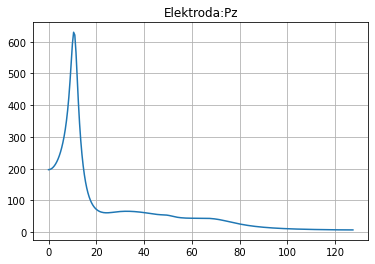

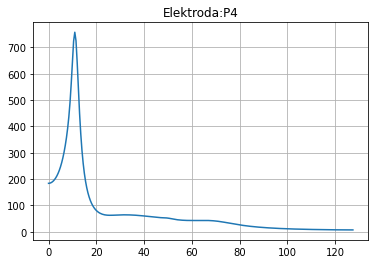

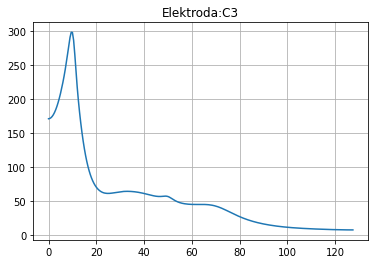

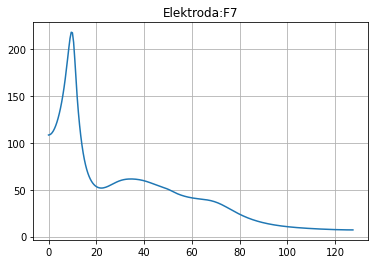

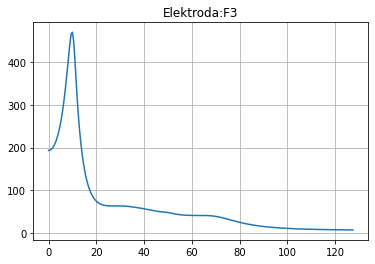

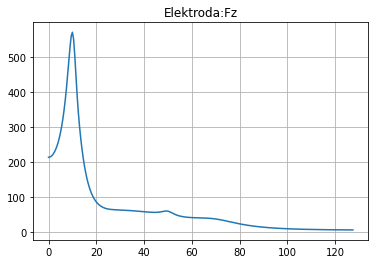

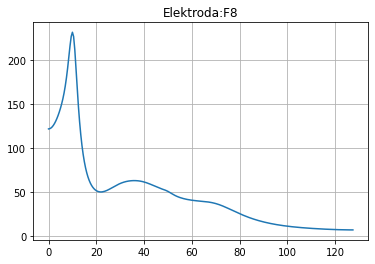

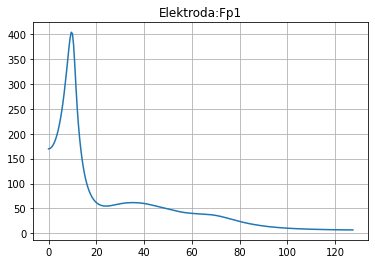

In [11]:
F,S=widmo_AR(bezA,5,Fs=fs)
for i in range(bezA.shape[0]):
  plt.title(f'Elektroda:{Nazwy[i]}')
  plt.grid()
  plt.plot(F,np.real(S[:,i,i]))
  plt.show()

## zadanie 3



In [12]:
plt.rcParams['figure.figsize'] = 9, 5

t,sin1=sin(32,0,128,8)
t2,sin2 = sin(32,np.pi/4,128,8)

sinr = sin2 + np.random.uniform(-0.2,0.2,sin2.shape[0])

sin_2ch = np.vstack((sin1,sinr))

print(sin_2ch.shape)



(2, 1024)


In [13]:
n=20
AIC2=np.zeros(n)
for i in range(0,n):
  P, V =  mtmvar.mult_AR(sin_2ch,i,1)
  AIC2[i] = np.log(np.linalg.det(V)) + 2*((np.shape(P)[0]*P.shape[1]**2)/sin_2ch.shape[1])
  #AIC[i] = np.log(np.linalg.det(V)) + 2*((np.shape(P)[0])/sygtest.shape[1])
  print(f'AIC dla rzędu {P.shape[0],AIC2[i]} ')

#plt.xlim(0,20)
#plt.ylim(3.8,4)
plt.plot(AIC2)
plt.grid()
plt.show()

#optymalny rząd - 3-5

AIC dla rzędu (0, -2.011993708531782) 
AIC dla rzędu (1, -7.944093836418682) 
AIC dla rzędu (2, -10.546840744265696) 
AIC dla rzędu (3, -10.539816435454537) 
AIC dla rzędu (4, -10.536964650668972) 
AIC dla rzędu (5, -10.530332817809859) 
AIC dla rzędu (6, -10.522911572427976) 
AIC dla rzędu (7, -10.515803703140325) 
AIC dla rzędu (8, -10.512247431180224) 
AIC dla rzędu (9, -10.504561397193802) 
AIC dla rzędu (10, -10.49800975393062) 
AIC dla rzędu (11, -10.491236553214508) 
AIC dla rzędu (12, -10.486571952814291) 
AIC dla rzędu (13, -10.483234534017825) 
AIC dla rzędu (14, -10.476586967165067) 
AIC dla rzędu (15, -10.469303759853835) 
AIC dla rzędu (16, -10.465645538183772) 
AIC dla rzędu (17, -10.458991491203752) 
AIC dla rzędu (18, -10.45279955287565) 
AIC dla rzędu (19, -10.446152711384933) 


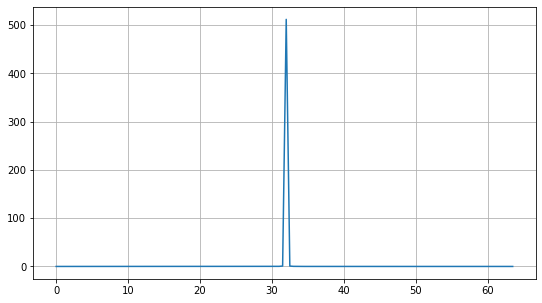

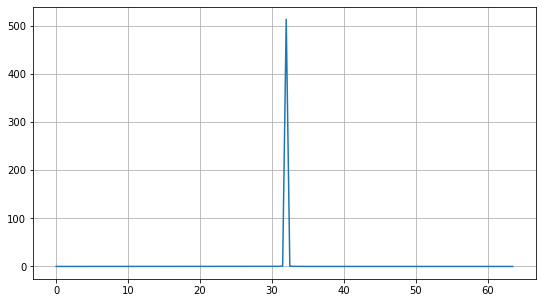

(128,)


In [14]:

F,S=widmo_AR(sin_2ch,2,Fs=128)
for i in range(sin_2ch.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
  plt.grid()
  plt.plot(F,np.real(S[:,i,i]))
  plt.show()

print(F.shape)

(128, 2, 2)
(128, 2, 2)


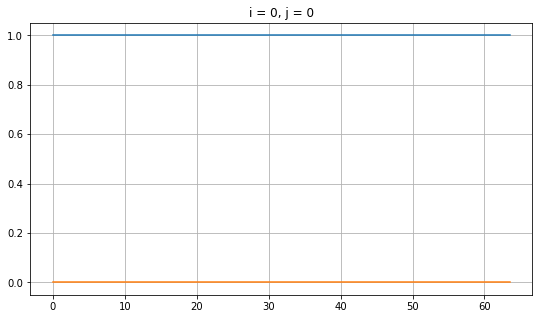

Wartość fazy dla 32 Hz 0.0


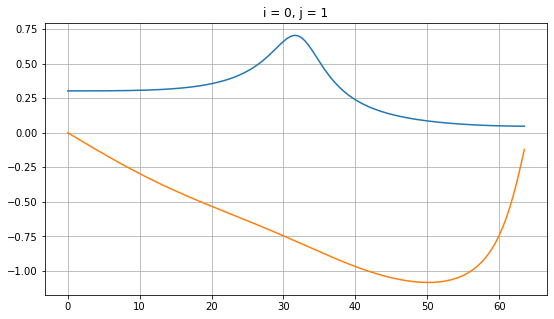

Wartość fazy dla 32 Hz -0.7918248433767213


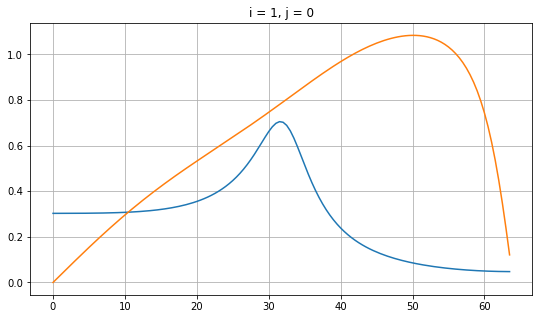

Wartość fazy dla 32 Hz 0.7918248433767214


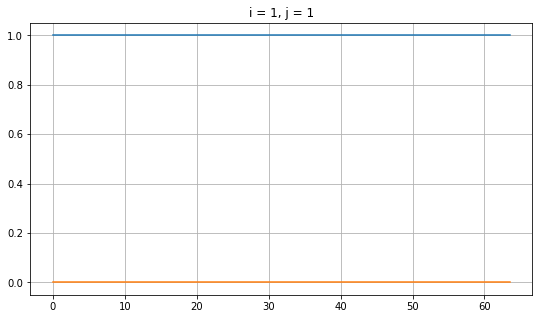

Wartość fazy dla 32 Hz 0.0


In [16]:
def koh(syg,rząd,Fs=128):
  F,S = widmo_AR(syg,rząd,Fs)
  print(S.shape)
  K_all = np.zeros((len(F),S.shape[1],S.shape[1]),dtype="complex")

  for f in range(len(F)):
    for i in range(S.shape[1]):
      for j in range(S.shape[1]):
        K_all[f,i,j] = S[f,i,j] / (S[f,i,i]*S[f,j,j])**(1/2)
    #K_all[f,:,:] = K
  return K_all

K = koh(sin_2ch,3)

print(K.shape)
#print(K)

'''
for i in range(sin_2ch.shape[0]):
  for j in range(sin_2ch.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    plt.title(f'i = {i}, j = {j}')
    plt.grid()
    plt.plot(F,K[:,i,j])
    plt.plot(F,np.abs(K[:,i,j]))
    plt.show()
'''    
for i in range(sin_2ch.shape[0]):
  for j in range(sin_2ch.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    plt.title(f'i = {i}, j = {j}')
    plt.grid()
    plt.plot(F,np.real(K[:,i,j]))
    plt.plot(F,np.angle(K[:,i,j]))
    plt.show()
    print(f'Wartość fazy dla 32 Hz {np.angle(K[64,i,j])}')

## Miary cząstkowe


In [28]:
def sin2(f,phi,Fs,T):
  t=np.arange(-1*T*Fs)/Fs
  syg=np.sin(t*2*np.pi*f+phi)
  return t,syg
t,sin1=sin(32,0,128,9)
print(sin1[127])
sin2=sin1[127:128*9-1]
sin2 = sin2*0.4 + np.random.uniform(-0.2,0.2,sin2.shape[0])
sin3=sin1[126:128*9-2] 
sin3 = 0.4*sin3 + np.random.uniform(-0.2,0.2,sin3.shape[0])
sin1=sin1[128:128*9]
t=t[128:128*9]
sin_3ch = np.vstack((sin1,sin2,sin3))
print(sin_3ch)

plt.plot(t,sin1)
plt.xlim([1,1.5])

plt.show()


-1.0
[[-7.83773951e-15  1.00000000e+00  1.86183452e-14 ...  1.00000000e+00
   1.73445888e-13 -1.00000000e+00]
 [-4.84994290e-01  3.15467961e-02  4.70240640e-01 ...  1.38715334e-01
   2.95243071e-01 -3.26945817e-02]
 [ 1.37600830e-01 -4.46491126e-01 -1.91035328e-01 ... -3.71625149e-01
   1.69201428e-01  3.30612212e-01]]


In [29]:
n=20
AIC2=np.zeros(n)
for i in range(0,n):
  P, V =  mtmvar.mult_AR(sin_3ch,i,1)
  AIC2[i] = np.log(np.linalg.det(V)) + 2*((np.shape(P)[0]*P.shape[1]**2)/sin_3ch.shape[1])
  #AIC[i] = np.log(np.linalg.det(V)) + 2*((np.shape(P)[0])/sygtest.shape[1])
  print(f'AIC dla rzędu {P.shape[0],AIC2[i]} ')

#plt.xlim(0,20)
#plt.ylim(3.8,4)
plt.plot(AIC2)
plt.grid()
plt.show()

#optymalny rząd - 3-5

AIC dla rzędu (0, -7.3654895599382755) 
AIC dla rzędu (1, -11.240662621505162) 
AIC dla rzędu (2, -14.844690511676774) 
AIC dla rzędu (3, -14.831842198985825) 
AIC dla rzędu (4, -14.825836656284928) 
AIC dla rzędu (5, -14.814075968294771) 
AIC dla rzędu (6, -14.801668202922594) 
AIC dla rzędu (7, -14.791531413643945) 
AIC dla rzędu (8, -14.77636586005407) 
AIC dla rzędu (9, -14.768593911330896) 
AIC dla rzędu (10, -14.75637713762928) 
AIC dla rzędu (11, -14.746132797973399) 
AIC dla rzędu (12, -14.730596801018503) 
AIC dla rzędu (13, -14.71644529549921) 
AIC dla rzędu (14, -14.703553334314902) 
AIC dla rzędu (15, -14.691777911457898) 
AIC dla rzędu (16, -14.677561208769195) 
AIC dla rzędu (17, -14.666247034229288) 
AIC dla rzędu (18, -14.652496987714036) 
AIC dla rzędu (19, -14.64027785847777) 


(128, 3, 3)
(128, 3, 3)
(3, 1024)


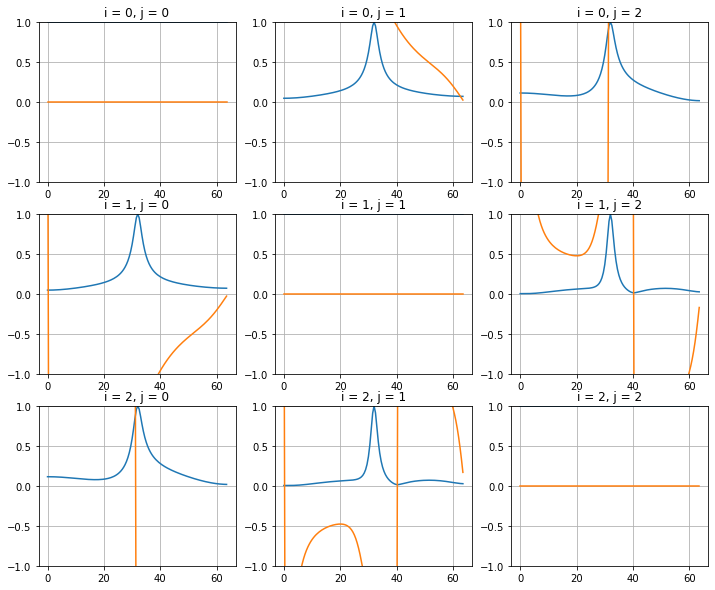

In [30]:
K_3ch = koh(sin_3ch,3,Fs=128)

print(K_3ch.shape)
print(sin_3ch.shape)
#print(K)

'''
for i in range(sin_2ch.shape[0]):
  for j in range(sin_2ch.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    plt.title(f'i = {i}, j = {j}')
    plt.grid()
    plt.plot(F,K[:,i,j])
    plt.plot(F,np.abs(K[:,i,j]))
    plt.show()
'''    

a=1
plt.rcParams['figure.figsize'] = 12,10
for i in range(sin_3ch.shape[0]):
  for j in range(sin_3ch.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    
    plt.subplot(3,3,a)
    plt.title(f'i = {i}, j = {j}')
    plt.grid()
    plt.plot(F,np.abs(K_3ch[:,i,j]))
    plt.plot(F,np.angle(K_3ch[:,i,j]))
    plt.ylim(-1,1)
    a+=1
    
plt.show()

## Koherencje cząstkowe


In [31]:
def kohcz(syg,rząd,Fs):
  F,S = widmo_AR(syg,rząd,Fs)
  print(S.shape)
  K_all = np.zeros((len(F),S.shape[1],S.shape[1]),dtype="complex")


  S=np.linalg.inv(S)
  for f in range(len(F)):
    for i in range(S.shape[1]):
      for j in range(S.shape[1]):
        K_all[f,i,j] = (-1)**(i+j) * (S[f,j,i]) / (S[f,i,i]*S[f,j,j])**(1/2)
    #K_all[f,:,:] = K
  return K_all

KC_3ch = kohcz(sin_3ch,3,128)




(128, 3, 3)


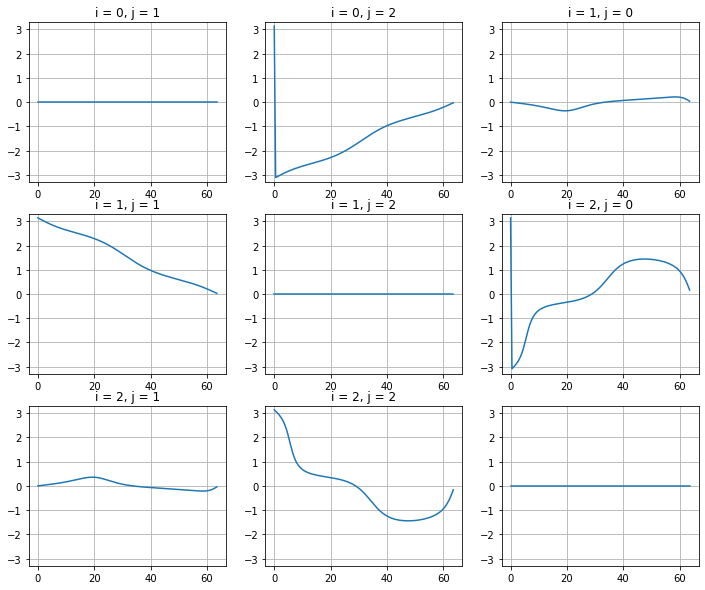

In [32]:
a=1
plt.rcParams['figure.figsize'] = 12,10
for i in range(sin_3ch.shape[0]):
  for j in range(sin_3ch.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    
    plt.title(f'i = {i}, j = {j}')
    
    plt.subplot(3,3,a)
    plt.grid()
    #plt.plot(F,KC_3ch[:,i,j])
    plt.plot(F,np.angle(KC_3ch[:,i,j]))
    plt.ylim(-3.3,3.3)
    
    a+=1
plt.show()

## zadanie 5 praca na sygnale


In [33]:
channels = [0,1,13,15]
nazwy1 = ['O1','O2','F3','F4']

sygEEG1 = sygx[(channels),200*256:220*256]
sygEEG2 = sygx2[(channels),61*256:63*256]



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


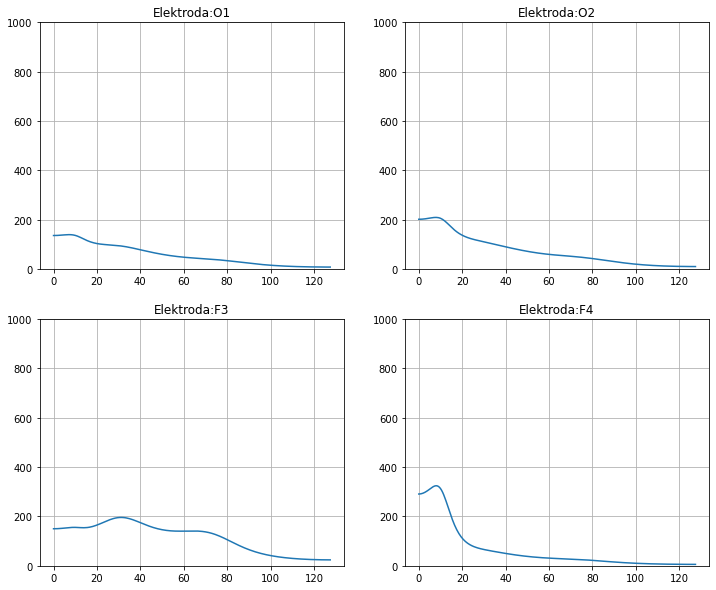

(256, 4, 4)
(256, 4, 4)


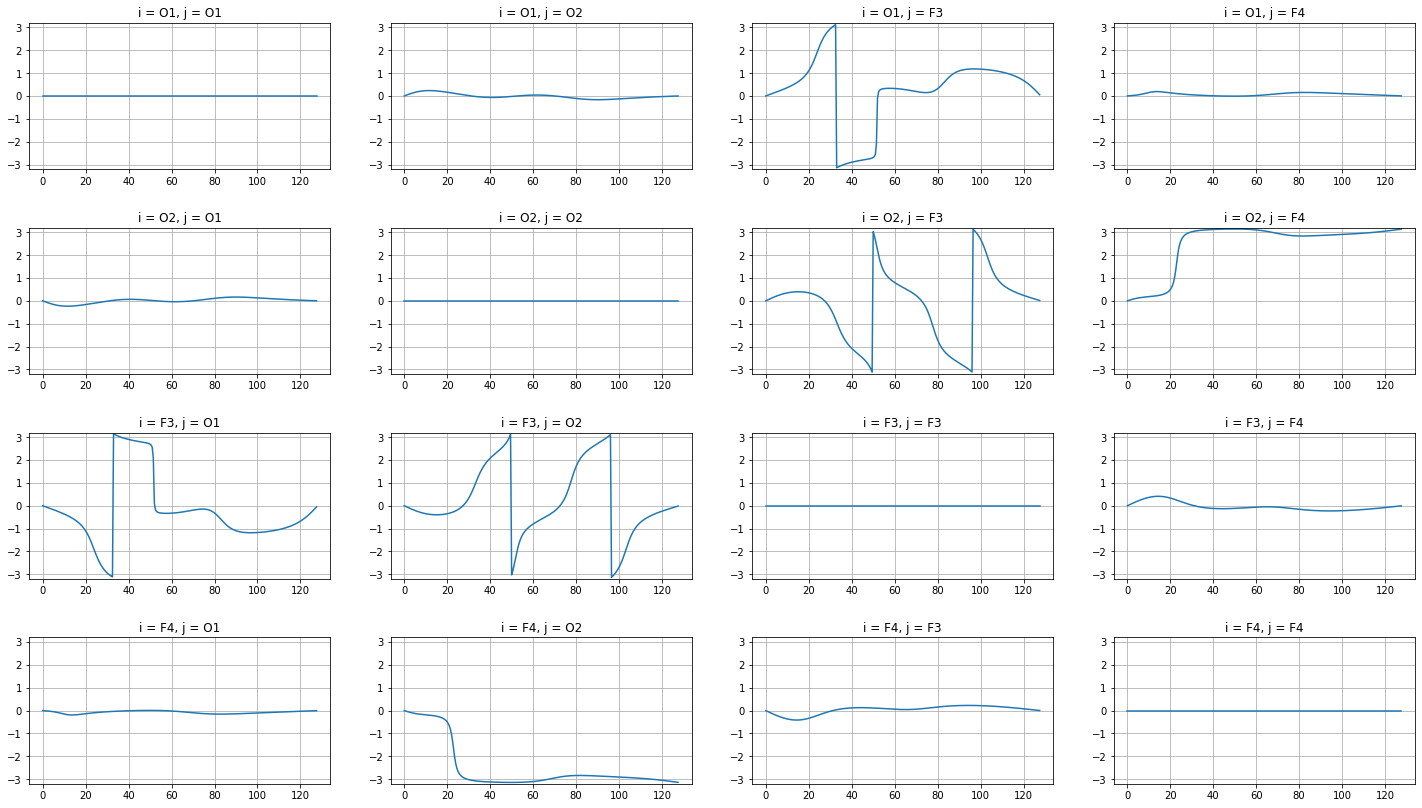

In [34]:
#optymalny rząd - 3-5
a=1
F,S=widmo_AR(sygEEG1,5,Fs=256)
for i in range(sygEEG1.shape[0]):
  
  plt.subplot(2,2,a)
  plt.title(f'Elektroda:{nazwy1[i]}')
  plt.grid()
  plt.ylim(0,1000)
  plt.plot(F,S[:,i,i])
  a+=1
plt.show()
  
KEEG1= koh(sygEEG1,5,Fs=256)
KCEEG1 = kohcz(sygEEG1,5,Fs=256)


b=1

for i in range(sygEEG1.shape[0]):
  for j in range(sygEEG1.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    plt.rcParams['figure.figsize'] = 22,14
    
    
    plt.subplots_adjust(hspace = 0.4,right=1)
    plt.subplot(4,4,b)
    plt.title(f'i = {nazwy1[i]}, j = {nazwy1[j]}')
    plt.grid()
    plt.ylim(0,1.1)
    plt.xlim(0,32)
    plt.plot(F,np.abs(KEEG1[:,i,j]))
    #plt.plot(F,np.angle(KC_3ch[:,i,j]))
    #plt.ylim(-1,1)
    plt.plot(F,np.abs(KCEEG1[:,i,j]))
    b+=1
plt.show()



b=1

for i in range(sygEEG1.shape[0]):
  for j in range(sygEEG1.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    plt.rcParams['figure.figsize'] = 22,14
    
    
    plt.subplots_adjust(hspace = 0.4,right=1)
    plt.subplot(4,4,b)
    plt.title(f'i = {nazwy1[i]}, j = {nazwy1[j]}')
    plt.grid()
    plt.ylim(-3.2,3.2)
    #plt.plot(F,np.angle(KEEG1[:,i,j]))
    #plt.plot(F,np.angle(KC_3ch[:,i,j]))
    #plt.ylim(-1,1)
    plt.plot(F,np.angle(KCEEG1[:,i,j]))
    b+=1
plt.show()

(256, 4, 4)
(256, 4, 4)


******************************************


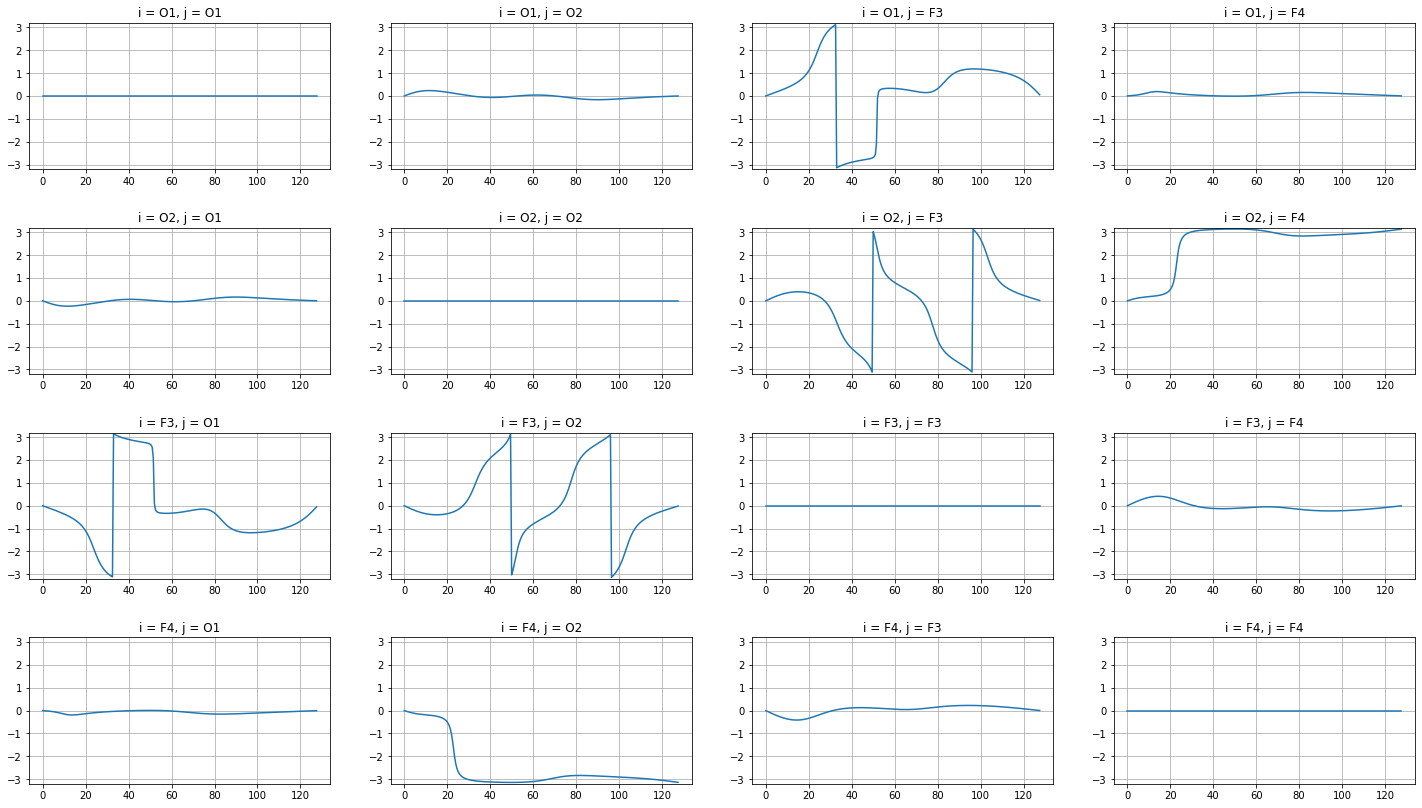

In [35]:
F,S=widmo_AR(sygEEG2,6,Fs=256)
a=1
for i in range(sygEEG2.shape[0]):
  
  plt.subplot(2,2,a)
  plt.title(f'Elektroda:{nazwy1[i]}')
  plt.grid()
  plt.ylim(0,1000)
  plt.plot(F,np.real(S[:,i,i]))
  a+=1
plt.show()
  
KEEG2= koh(sygEEG2,5,Fs=256)
KCEEG2 = kohcz(sygEEG2,5,Fs=256)


b=1

for i in range(sygEEG2.shape[0]):
  for j in range(sygEEG2.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    plt.rcParams['figure.figsize'] = 22,14
    
    
    plt.subplots_adjust(hspace = 0.4,right=1)
    plt.subplot(4,4,b)
    plt.title(f'i = {nazwy1[i]}, j = {nazwy1[j]}')
    plt.grid()
    plt.ylim(0,1.1)
    plt.xlim(0,32)
    plt.plot(F,np.abs(KEEG2[:,i,j]))
    #plt.plot(F,np.angle(KC_3ch[:,i,j]))
    #plt.ylim(-1,1)
    plt.plot(F,np.abs(KCEEG2[:,i,j]))
    b+=1
plt.show()


b=1



print(f'******************************************')
for i in range(sygEEG1.shape[0]):
  for j in range(sygEEG1.shape[0]):
  #plt.title(f'Elektroda:{Nazwy[i]}')
    #if i != j:
    plt.rcParams['figure.figsize'] = 22,14
    
    
    plt.subplots_adjust(hspace = 0.4,right=1)
    plt.subplot(4,4,b)
    plt.title(f'i = {nazwy1[i]}, j = {nazwy1[j]}')
    plt.grid()
    plt.ylim(-3.2,3.2)
    #plt.plot(F,np.angle(KEEG1[:,i,j]))
    #plt.plot(F,np.angle(KC_3ch[:,i,j]))
    #plt.ylim(-1,1)
    plt.plot(F,np.angle(KCEEG1[:,i,j]))
    b+=1
plt.show()
